In [1]:
%autosave 300

Autosaving every 300 seconds


In [2]:
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from skopt.plots import plot_convergence

from jupyterthemes import jtplot
jtplot.style()

In [7]:
def create_boxplots(names, results):
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(111)
    plt.boxplot(results, whiskerprops={'color': '#987987', 'linewidth': 2}, boxprops={'color': '#987987', 'linewidth': 2}, medianprops={'color': '#789789', 'linewidth': 2}, capprops={'color': '#987987', 'linewidth': 2}, flierprops={'markeredgecolor': '#798798', 'linewidth': 2})
    ax.set_xticklabels(names)
    ax.tick_params(axis='x', colors='#ffffff')
    ax.tick_params(axis='y', colors='#ffffff')
    plt.show()
    
    
def print_results(res, names):
    print('best score', ':', res.fun, end='\n\n')
    for n, v in enumerate(names):
        print(v, ':', res.x[n])

In [4]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df = pd.read_csv(url, names=names)

X = df.iloc[:, :8].values
y = df.iloc[:, 8].values

n_features = X.shape[1]

print(df.shape)
df.head(2)

(768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [5]:
scl = StandardScaler()
X_std = scl.fit_transform(X)

In [6]:
models = [
    ('Log', LogisticRegression(max_iter=1000)),
    ('GB', GradientBoostingClassifier()),
    ('RF', RandomForestClassifier()),
    ('ET', ExtraTreesClassifier())
]

results = []
names = []

seed = 7
scoring = 'accuracy'

for name, model in models:
    t = time()
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_std, y, cv=kfold, scoring=scoring, n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    t = time() - t
    print("%s:\t%f (%f) - %f" % (name, np.median(cv_results), cv_results.std(), t))

Log:	0.785714 (0.047603) - 4.203849
GB:	0.772727 (0.055823) - 3.885521
RF:	0.753247 (0.057529) - 3.895792
ET:	0.727273 (0.052595) - 3.891155


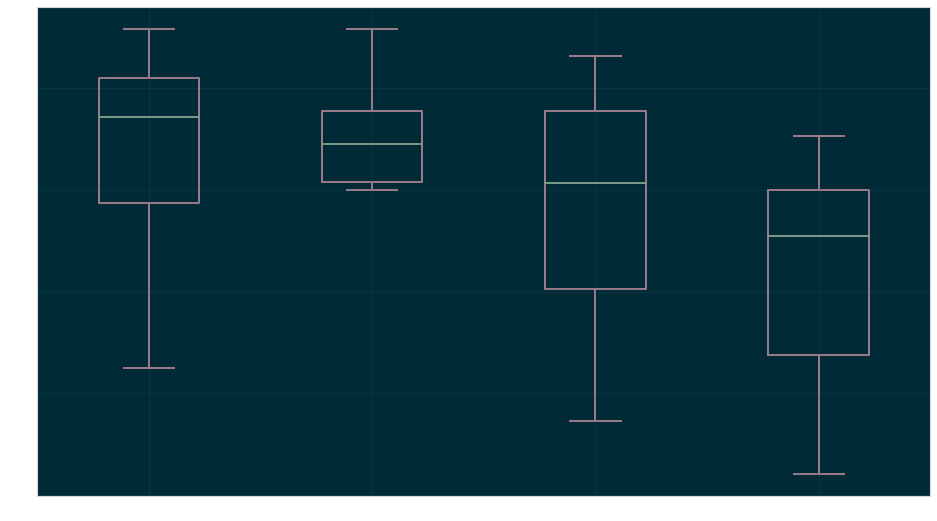

In [8]:
create_boxplots(names, results)